# Medical Expense Prediction

## Data Pre - Processing

In [53]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

# Setting Up Visualisation
plt.rcParams['figure.figsize'] = (19, 9)
plt.style.use('fivethirtyeight')

In [54]:
# Making a Dataframe from the input
data = pd.read_csv('Medical_Insurance.csv')

# Dimensions
data.shape

(1338, 7)

In [55]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [56]:
# Check for missing values in the dataset
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [57]:
data.describe().style.background_gradient(cmap='icefire_r')

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## Univiariate Analysis

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



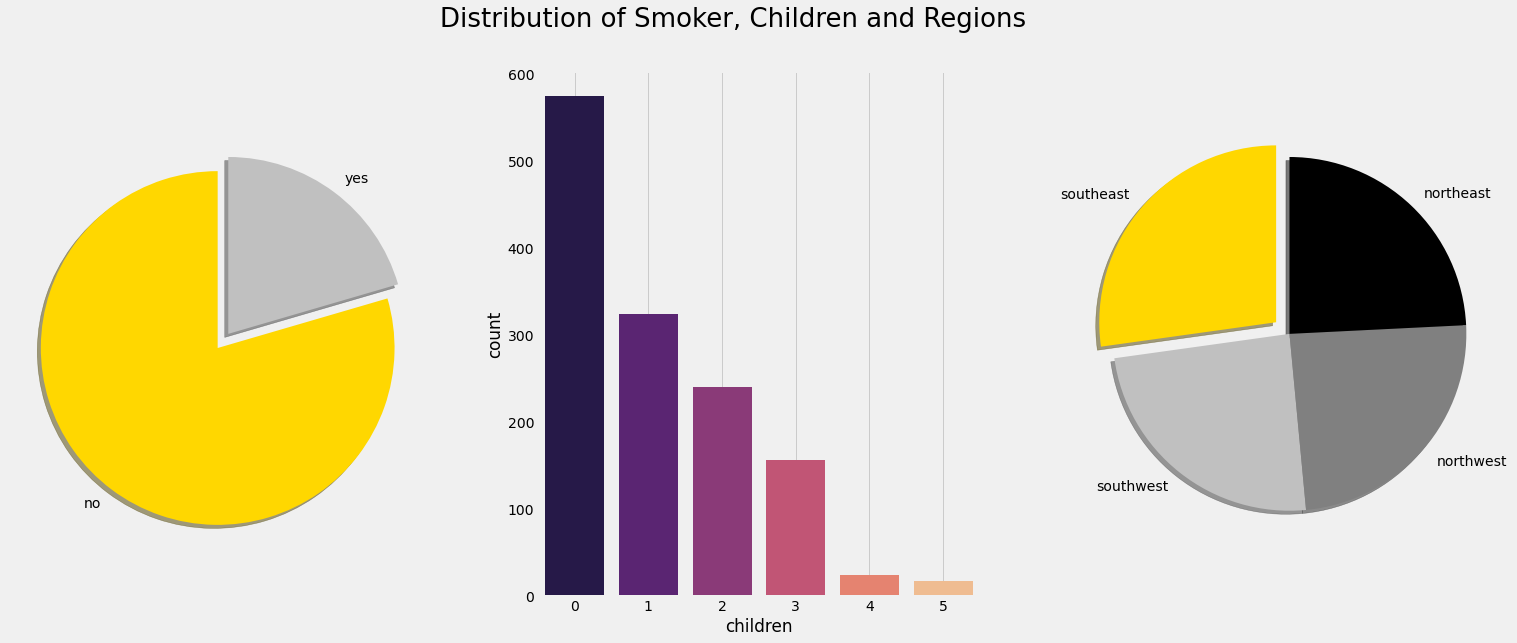

In [58]:
# Checking distribution of smoker, children, region first

# Plot 1
plt.subplot (1, 3, 1)

plt.pie ( data['smoker'].value_counts().values,
          labels = data['smoker'].value_counts().index,
          colors = ['gold','silver'],
          startangle = 90,
          shadow = True,
          explode = [0.1, 0] )


# Plot 2
plt.subplot (1, 3, 2)

sb.countplot ( data['children'], palette = 'magma' )
plt.grid()


# Plot 3
plt.subplot (1, 3, 3)

plt.pie ( data['region'].value_counts().values,
          labels = data['region'].value_counts().index,
          colors = ['gold','silver','grey','black'],
          startangle = 90,
          shadow = True,
          explode = [0.1, 0, 0, 0] )

# Plot Out
plt.suptitle('Distribution of Smoker, Children and Regions', fontsize = 26)

plt.show()

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level func

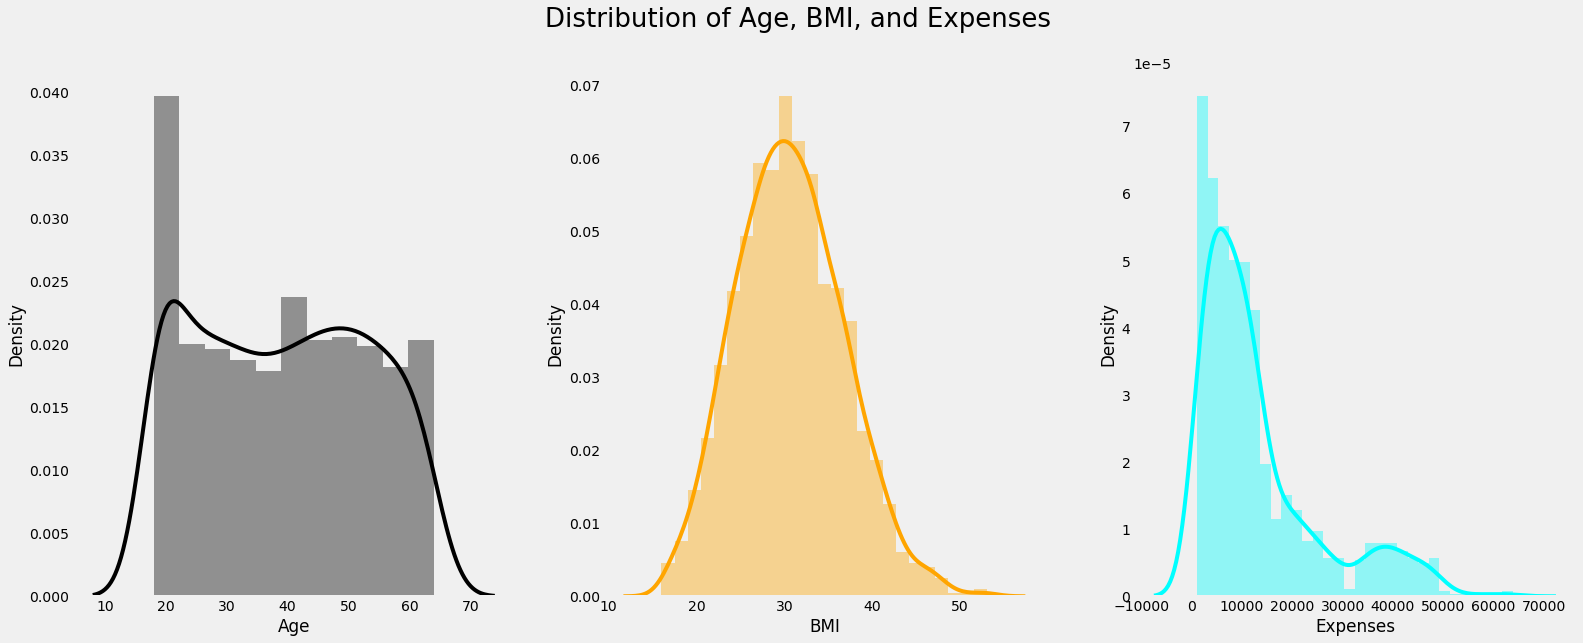

In [59]:
# Checking distribution of age, bmi and expenses next

# Plot 1
plt.subplot (1, 3, 1)

sb.distplot (data['age'], color ='black')
plt.xlabel ('Age')
plt.grid()


# Plot 2
plt.subplot (1, 3, 2)

sb.distplot (data['bmi'], color = 'orange')
plt.xlabel ('BMI')
plt.grid()


# Plot 3
plt.subplot (1, 3, 3)

sb.distplot (data['expenses'], color = 'aqua')
plt.xlabel ('Expenses')
plt.grid()


# Plot Out
plt.suptitle ('Distribution of Age, BMI, and Expenses', fontsize = 26)

plt.show()

## Biviariate Analysis

In [60]:
# Age vs Expense
px.scatter (data, y = 'expenses', x = 'age', trendline = 'ols')

- Increasing age causes increased expenses (from trendline)

In [61]:
# BMI vs Expenses
px.scatter (data, y = 'expenses', x = 'bmi', trendline = 'ols')

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



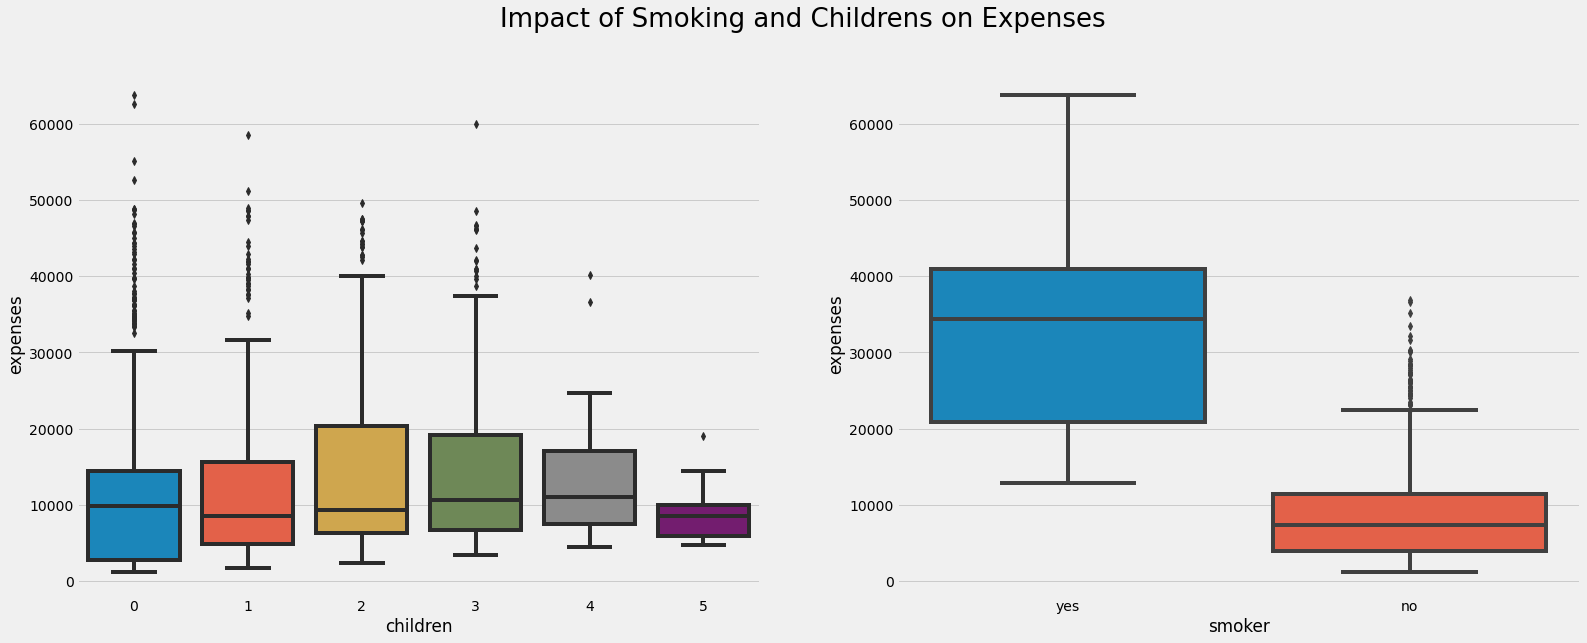

In [62]:
# Smoking and Children vs Expenses

# Plot 1
plt.subplot(1, 2, 1)
sb.boxplot(data['children'], data['expenses'])

# Plot 2
plt.subplot(1, 2, 2)
sb.boxplot(data['smoker'], data['expenses'])

# Plot Out
plt.suptitle('Impact of Smoking and Childrens on Expenses', fontsize = 26)
plt.show()


## Multivariate Analysis

In [63]:
# Capping Children <4,5> due to similar effect

data['children'] = data['children'].replace( (4, 5), (3, 3) )

# Checking value counts
data['children'].value_counts()

0    574
1    324
2    240
3    200
Name: children, dtype: int64

In [64]:
# Region, Smoking, Children and Age vs Expenses
px.scatter (data,
            x = "expenses",
            y = "age",
            facet_row = "children",
            facet_col = "region",
            color = "smoker",
            trendline = "ols")


* Age has a steady and increasing effect on expenses

- Smoking has a significant impact on the expenses, which cost
  - Non - Smokers $10-20k
  - Smokers $20-60k

In [65]:
# Region, Smoking, Children and BMI vs Expenses

px.scatter (data,
            x = "expenses",
            y = "bmi",
            facet_row = "children",
            facet_col = "region",
            color = "smoker",
            trendline = "ols")

- Similar trendlines appear for BMI as well
- BMI impacts Smokers significantly ($20k-50k)
- On the contrary, Non - Smokers have very little effect of BMI 

In [66]:
# A Bubble Chart of Expense vs BMI, Age, Smoking (North - West Region)

px.scatter (data,
            x = "expenses",
            y = "bmi",
            size = "age",
            color = "smoker",
            hover_name = "expenses", size_max = 18)


- This indicates BMI isn't the bottleneck (Low BMI/High Expenses observed)
- Smoking & Age (size of Bubble) still significant factors

In [67]:
px.bar_polar (data,
             r = "expenses",
             theta = "region",
             color = 'sex',
             template = 'plotly_dark',
             color_discrete_sequence = px.colors.sequential.Plasma_r)

- South - East has higher expenses than other regions
- Males have a higher expense, in general over Females

In [68]:
# Expense grouping by region

data[['expenses', 'region']].groupby(['region']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')

In [69]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Data Processing

In [70]:
# Encoding according to expenses

# Males > Females ==> Males = 2 | Females = 1
# Similarly Smokers = 2 | Non - Smokers = 1
# South - East Region has higher expense but the rest are nearby so proportionate encoding

data['sex'] = data['sex'].replace (('male', 'female'), (2, 1))
data['smoker'] = data['smoker'].replace (('yes', 'no'), (2, 1))
data['region'] = data['region'].replace (('southeast', 'southwest', 'northeast', 'northwest'), (2, 1, 1, 1))

# Check for remaining categorical columns
data.select_dtypes('object').columns


Index([], dtype='object')

In [71]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,2,1,16884.92
1,18,2,33.8,1,1,2,1725.55
2,28,2,33.0,3,1,2,4449.46
3,33,2,22.7,0,1,1,21984.47
4,32,2,28.9,0,1,1,3866.86


In [72]:
# Forming Dependent and Independent sets

y = data['expenses']
x = data.drop(['expenses'], axis = 1)

print(y.shape)
print(x.columns)

(1338,)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [73]:
# Train - Test - Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


In [74]:
# Standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform (x_train)
x_test = sc.transform (x_test)

## Predictive Modelling

In [75]:
# Creating a simple Linear Regression Model

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit (x_train, y_train)

y_pred1 = model1.predict (x_test)

In [76]:
# Model Accuracy -- R2 // RMSE

from sklearn.metrics import r2_score, mean_squared_error


mse = mean_squared_error (y_test, y_pred1)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score (y_test, y_pred1)
print("R2 Score :", r2_score)

RMSE Score : 5665.098223602283
R2 Score : 0.7983199562954781


In [77]:
# Making a Random Forest Model

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

model2 = RandomForestRegressor()
model2.fit (x_train, y_train)

y_pred2 = model2.predict (x_test)


mse = mean_squared_error (y_test, y_pred2)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score (y_test, y_pred2)
print("R2 Score :", r2_score)

RMSE Score : 4418.2179718798325
R2 Score : 0.877328884612344


In [78]:
# Making a Gradient Boosting Model

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

model3 = GradientBoostingRegressor()
model3.fit (x_train, y_train)

y_pred3 = model3.predict (x_test)


mse = mean_squared_error (y_test, y_pred3)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score (y_test, y_pred3)
print("R2 Score :", r2_score)

RMSE Score : 4094.5685268946436
R2 Score : 0.8946427743065142


In [79]:
# Ensemble by average

from sklearn.metrics import r2_score, mean_squared_error
avg_model = (y_pred1 + y_pred2 + y_pred3) / 3


mse = mean_squared_error (y_test, avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score (y_test, avg_model)
print("R2 Score :", r2_score)


RMSE Score : 4287.639219352245
R2 Score : 0.8844727307530619


In [80]:
# Making Weighted Average model

from sklearn.metrics import r2_score, mean_squared_error
weight_avg_model = 0.25*y_pred1 + 0.35*y_pred2 + 0.4*y_pred3


mse = mean_squared_error (y_test, weight_avg_model)
rmse = np.sqrt(mse)
print("RMSE Score :", rmse)

r2_score = r2_score (y_test, weight_avg_model)
print("R2 Score :", r2_score)


RMSE Score : 4209.5700797732525
R2 Score : 0.8886414605541317


In [81]:
# Performing Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score (model3, x, y, cv = 10)
print(scores)

[0.88749292 0.86279778 0.84068084 0.74069815 0.86942091 0.92562952
 0.87677327 0.82085971 0.85949947 0.85993928]
